# import libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# TensorFlow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

#import model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import regularizers


# data preprocessing

In [2]:

dir = '../input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'
label = []
path = []
for dirname, _,filenames in os.walk(dir):
    for filename in filenames:
        if os.path.splitext(filename)[1]=='.png':
            if dirname.split()[-1]!='GT':          
                label.append(os.path.split(dirname)[1])
                path.append(os.path.join(dirname,filename))

data = pd.DataFrame(columns=['path','label'])
data['path']=path
data['label']=label

In [3]:
data.head(10) # ilk on veri

,path,label
0,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
1,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
2,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
3,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
4,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
5,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
6,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
7,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
8,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
9,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel


In [4]:
data.info() # veri hakkında bilgi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9000 non-null   object
 1   label   9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


In [5]:
data['label'].value_counts() # her label için adet sayısı

label
Hourse Mackerel       1000
Black Sea Sprat       1000
Sea Bass              1000
Red Mullet            1000
Trout                 1000
Striped Red Mullet    1000
Shrimp                1000
Gilt-Head Bream       1000
Red Sea Bream         1000
Name: count, dtype: int64

In [6]:
data['label'].unique() # bensersiz değerler

array(['Hourse Mackerel', 'Black Sea Sprat', 'Sea Bass', 'Red Mullet',
       'Trout', 'Striped Red Mullet', 'Shrimp', 'Gilt-Head Bream',
       'Red Sea Bream'], dtype=object)

In [7]:
def get_images(data):
    images = []
    for a in range(0,data.size):
        img_path = data[a]
        img = load_img(img_path,target_size=(224, 224),color_mode='grayscale') # 224*224 resim
        img_array = img_to_array(img)
        images.append(img_array)

    return np.array(images)

In [8]:
X = get_images(data['path'])

In [9]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['label'])
y_categorical = to_categorical(y_encoded)


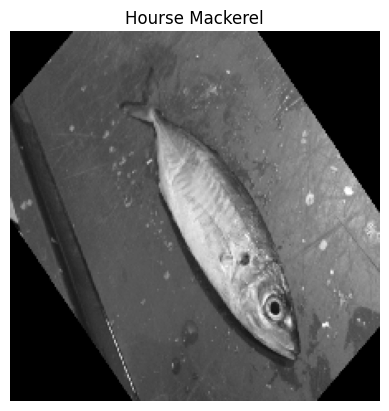

In [10]:
plt.imshow(X[0],cmap='gray') # cmap viridis
plt.axis('off')
plt.title(data['label'][0])
plt.show()

# splitting data train and test

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_categorical, test_size=0.20, random_state=42) #test size 0.20,0.33

In [27]:
print(X_train.shape)
print(X_test.shape)

(7200, 224, 224, 1)
(1800, 224, 224, 1)


In [28]:
X.shape

(9000, 224, 224, 1)

In [29]:
y_train.shape

(7200, 9)

In [30]:
X=X.astype('float32')/255

In [31]:
X.shape

(9000, 224, 224, 1)

# model training

In [38]:
model = Sequential()
model.add(Flatten(input_shape=(224, 224)))
model.add(Dense(256, kernel_initializer='he_normal', activation='relu'))  # kernel için RandomUniform, he_normal, glorot_uniform
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(9, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
history=model.fit(X_train, y_train, epochs=15 ,validation_split=0.2) # epoch 10 ,15

Epoch 1/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 25s 133ms/step - accuracy: 0.2358 - loss: 3.5275 - val_accuracy: 0.4500 - val_loss: 1.4934
Epoch 2/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 24s 132ms/step - accuracy: 0.4909 - loss: 1.4691 - val_accuracy: 0.4618 - val_loss: 1.4099
Epoch 3/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 24s 132ms/step - accuracy: 0.5839 - loss: 1.1713 - val_accuracy: 0.5500 - val_loss: 1.2171
Epoch 4/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 24s 131ms/step - accuracy: 0.6655 - loss: 0.9826 - val_accuracy: 0.7118 - val_loss: 0.7828
Epoch 5/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 41s 133ms/step - accuracy: 0.7490 - loss: 0.7321 - val_accuracy: 0.6569 - val_loss: 0.9389
Epoch 6/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 24s 133ms/step - accuracy: 0.7525 - loss: 0.7142 - val_accuracy: 0.6875 - val_loss: 0.8374
Epoch 7/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 24s 131ms/step - accuracy: 0.8027 - loss: 0.5644 - val_accuracy: 0.6090 - val_loss: 1.0090
Epoch 8/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 24s 134ms/step - accuracy: 0.8139 - loss: 0

# Summary

In [40]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,661,149 (147.48 MB)

 Trainable params: 12,887,049 (49.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,774,100 (98.32 MB)

# model analys


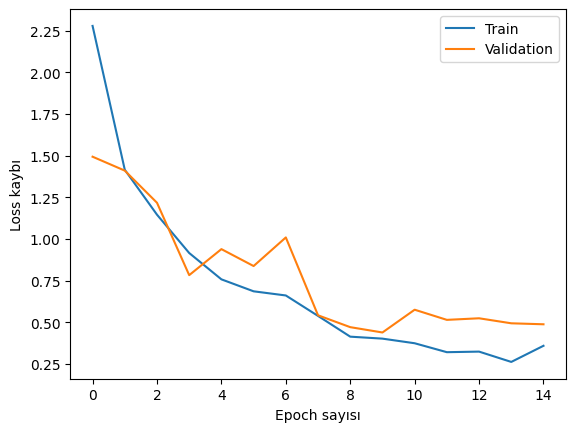

In [41]:
plt.plot(history.history["loss"],label="Train")
plt.plot(history.history["val_loss"],label="Validation")

plt.xlabel("Epoch sayısı")
plt.ylabel("Loss kaybı")

plt.legend()
plt.show()

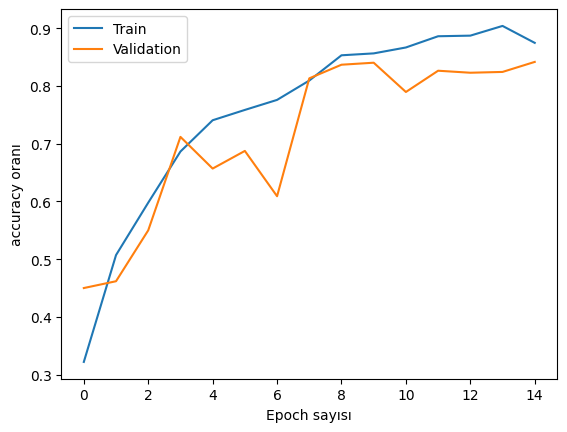

In [42]:
plt.plot(history.history["accuracy"],label="Train")

plt.plot(history.history["val_accuracy"],label="Validation")

plt.xlabel("Epoch sayısı")
plt.ylabel("accuracy oranı")

plt.legend()
plt.show()

In [43]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Kaybı: {loss:.4f}, Test Başarısı : {accuracy:.4f}')

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8213 - loss: 0.5280
Test Kaybı: 0.5038, Test Başarısı : 0.8283


In [44]:
y_pred = model.predict(X_test)
y_test_result= np.argmax(y_test, axis=1)

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [51]:
print(classification_report(y_test_result,y_pred_classes))

              precision    recall  f1-score   support

           0       0.66      0.95      0.78       211
           1       0.87      0.78      0.82       204
           2       0.93      0.83      0.87       195
           3       0.82      0.97      0.89       191
           4       0.90      0.94      0.91       201
           5       0.97      0.35      0.51       179
           6       0.90      0.90      0.90       209
           7       0.73      0.92      0.81       207
           8       0.92      0.77      0.84       203

    accuracy                           0.83      1800
   macro avg       0.85      0.82      0.82      1800
weighted avg       0.85      0.83      0.82      1800



<Axes: >

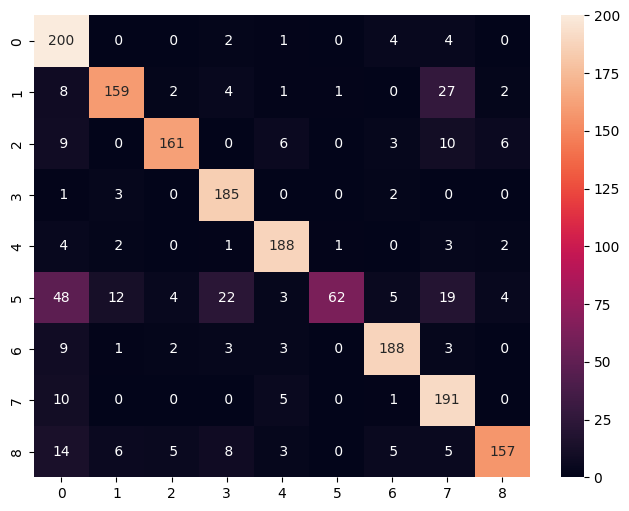

In [55]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test_result,y_pred_classes), annot=True, fmt='2d')